In [134]:
import pandas as pd
import numpy as np

**<h2 align ="center" style='color: white'>Model which Classifies customers based based on risk</h2>**

In [135]:
cust_data_mixed2 = pd.read_csv('data/CustDataMixed2.csv')
cust_data_mixed2.head()

,Lastname,First Name,zip,state,county,city,CustomerID,TransactionID,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (USD),Risk Level,Age,Status
0,Abdul,Ruby,12475,New York,Ulster,Ruby,C5841053,T1,17819.05,2/8/16,143207.0,25.0,Moderate,45,Unemployed
1,Abdul,Ruby,29741,South Carolina,Chesterfield,Ruby,C2142763,T2,2270.69,2/8/16,141858.0,27999.0,Moderate,29,Employed
2,Abdul,Ruby,99768,Alaska,Yukon-Koyukuk,Ruby,C4417068,T3,17874.44,2/8/16,142712.0,459.0,Moderate,37,Employed
3,Mohammad,Louise,77455,Texas,Wharton,Louise,C5342380,T4,866503.21,2/8/16,142714.0,2060.0,Very Low,97,Retired
4,Mohammad,Louise,77455,Texas,Wharton,Louise,C5342380,T391139,3195.78,13/8/16,194148.0,878.4,Very Low,73,Retired


In [136]:
cust_data_mixed2.shape

(1415088, 15)

In [137]:
cust_data_mixed2.head()

,Lastname,First Name,zip,state,county,city,CustomerID,TransactionID,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (USD),Risk Level,Age,Status
0,Abdul,Ruby,12475,New York,Ulster,Ruby,C5841053,T1,17819.05,2/8/16,143207.0,25.0,Moderate,45,Unemployed
1,Abdul,Ruby,29741,South Carolina,Chesterfield,Ruby,C2142763,T2,2270.69,2/8/16,141858.0,27999.0,Moderate,29,Employed
2,Abdul,Ruby,99768,Alaska,Yukon-Koyukuk,Ruby,C4417068,T3,17874.44,2/8/16,142712.0,459.0,Moderate,37,Employed
3,Mohammad,Louise,77455,Texas,Wharton,Louise,C5342380,T4,866503.21,2/8/16,142714.0,2060.0,Very Low,97,Retired
4,Mohammad,Louise,77455,Texas,Wharton,Louise,C5342380,T391139,3195.78,13/8/16,194148.0,878.4,Very Low,73,Retired


In [138]:
# random_columns2 = cust_data_mixed2.sample(n=32240, axis=0, random_state=42,replace=True)
# random_columns2.head(2)

**<h4 align ="left" style='color: white'>Working with sample size of 32,240</h4>**

In [139]:
random_columns2 = cust_data_mixed2.sample(n=32240, axis=0, random_state=42,replace=True)
random_columns2.head()

,Lastname,First Name,zip,state,county,city,CustomerID,TransactionID,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (USD),Risk Level,Age,Status
121958,Abib,Everett,98203,Washington,Snohomish,Everett,C9041037,T90626,20117.73,22/9/16,112336.0,1.00,Low,55,High Income
671155,Abdulstar,Bruce,54819,Wisconsin,Rusk,Bruce,C3949786,T497355,47388.11,20/8/16,162156.0,820.00,Very Low,95,Retired
131932,Neleem,Sandy,84092,Utah,Salt Lake,Sandy,C8532260,T97961,5253.99,1/8/16,173800.0,558.25,Low,61,High Income
1414414,Abdulkarim,Marion,66861,Kansas,Marion,Marion,C7956176,T1048046,6067.04,18/9/16,74051.0,20.00,Low,47,Student
259178,Khushi Ram,Eugene,97401,Oregon,Lane,Eugene,C6921752,T192099,14446.45,9/8/16,205656.0,350.00,Moderate,28,Employed


In [140]:
random_columns2.shape

(32240, 15)

In [141]:
# give me a new dataset of 1200 columns from cust_data_mixed2

In [142]:
df = random_columns2.copy()

In [143]:
df.head(5)

,Lastname,First Name,zip,state,county,city,CustomerID,TransactionID,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (USD),Risk Level,Age,Status
121958,Abib,Everett,98203,Washington,Snohomish,Everett,C9041037,T90626,20117.73,22/9/16,112336.0,1.00,Low,55,High Income
671155,Abdulstar,Bruce,54819,Wisconsin,Rusk,Bruce,C3949786,T497355,47388.11,20/8/16,162156.0,820.00,Very Low,95,Retired
131932,Neleem,Sandy,84092,Utah,Salt Lake,Sandy,C8532260,T97961,5253.99,1/8/16,173800.0,558.25,Low,61,High Income
1414414,Abdulkarim,Marion,66861,Kansas,Marion,Marion,C7956176,T1048046,6067.04,18/9/16,74051.0,20.00,Low,47,Student
259178,Khushi Ram,Eugene,97401,Oregon,Lane,Eugene,C6921752,T192099,14446.45,9/8/16,205656.0,350.00,Moderate,28,Employed


In [144]:
y = df['Risk Level']
X = df[['Age', 'Status', 'city','zip']]

In [145]:
y.head(5)

121958          Low
671155     Very Low
131932          Low
1414414         Low
259178     Moderate
Name: Risk Level, dtype: object

In [146]:
X.head(5)

,Age,Status,city,zip
121958,55,High Income,Everett,98203
671155,95,Retired,Bruce,54819
131932,61,High Income,Sandy,84092
1414414,47,Student,Marion,66861
259178,28,Employed,Eugene,97401


**<h4 align ="left" style='color: white'>One hot encoding for categorical variables in X which is norminal (Variables that are not ranked)</h4>**

In [147]:
X_encoded = pd.get_dummies(X, columns=['Status', 'city'], drop_first=True)
X_encoded.head()

,Age,zip,Status_High Income,Status_Retired,Status_Student,Status_Unemployed,city_Adah,city_Addison,city_Adell,city_Adger,...,city_Woody,city_Worth,city_Wright,city_Wyatt,city_Wylie,city_Zachary,city_Zamora,city_Zebulon,city_Zion,city_Zoe
121958,55,98203,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
671155,95,54819,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131932,61,84092,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1414414,47,66861,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
259178,28,97401,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**<h4 align ="left" style='color: white'>OrdinalEncoder encoding for y which is Ordinal Variable  (Variable which can be ranked) </h4>**

In [148]:
from sklearn.preprocessing import OrdinalEncoder

# Reshape y to a 2D array as required by OrdinalEncoder
y_reshaped = y.values.reshape(-1, 1)

# Apply OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
y_encoded = ordinal_encoder.fit_transform(y_reshaped)

# Convert back to a pandas Series for convenience
y_encoded = pd.Series(y_encoded.flatten(), name='Risk Level Encoded')

y_encoded.head()

0    1.0
1    4.0
2    1.0
3    1.0
4    2.0
Name: Risk Level Encoded, dtype: float64

In [149]:
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25792, 1155)
X_test shape: (6448, 1155)
y_train shape: (25792,)
y_test shape: (6448,)


In [150]:
# Calculate percentages
total_samples = len(y)
train_percentage = (len(y_train) / total_samples) * 100
test_percentage = (len(y_test) / total_samples) * 100

# Print the results
print(f"Train dataset percentage: {train_percentage:.2f}%")
print(f"Test dataset percentage: {test_percentage:.2f}%")

Train dataset percentage: 80.00%
Test dataset percentage: 20.00%


**<h4 align ="left" style='color: white'>Training and comparing different models </h4>**

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Define the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "xgb_model": XGBClassifier(random_state=42),
    "knn_model" : KNeighborsClassifier(n_neighbors=5),
    "ada_model " : AdaBoostClassifier(random_state=42),
    "mlp_model" : MLPClassifier(random_state=42, max_iter=500),
    "svm_model" : SVC(class_weight='balanced', random_state=42)

   
    
    
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    # Print classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84       290
         1.0       0.99      0.96      0.97      2081
         2.0       0.83      1.00      0.91      1414
         3.0       0.00      0.00      0.00       152
         4.0       0.99      0.99      0.99      2511

    accuracy                           0.95      6448
   macro avg       0.76      0.74      0.74      6448
weighted avg       0.93      0.95      0.94      6448

--------------------------------------------------


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Model: Decision Tree
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       290
         1.0       1.00      1.00      1.00      2081
         2.0       0.99      1.00      1.00      1414
         3.0       1.00      0.99      1.00       152
         4.0       1.00      1.00      1.00      2511

    accuracy                           1.00      6448
   macro avg       0.99      0.99      0.99      6448
weighted avg       1.00      1.00      1.00      6448

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       290
         1.0       1.00      1.00      1.00      2081
         2.0       0.99      1.00      1.00      1414
         3.0       1.00      0.99      0.99       152
         4.0       1.00      1.00      1.00      2511

    accuracy                           1.00      6448
   macro avg       1.00      0.99     

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Model: Support Vector Machine
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       290
         1.0       0.00      0.00      0.00      2081
         2.0       0.00      0.00      0.00      1414
         3.0       0.00      0.00      0.00       152
         4.0       0.39      1.00      0.56      2511

    accuracy                           0.39      6448
   macro avg       0.08      0.20      0.11      6448
weighted avg       0.15      0.39      0.22      6448

--------------------------------------------------
Model: xgb_model
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       290
         1.0       1.00      1.00      1.00      2081
         2.0       0.99      1.00      1.00      1414
         3.0       0.98      0.99      0.98       152
         4.0       1.00      0.99      1.00      2511

    accuracy                           1.00      6448
   macro avg       0.99      0.99

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**<h4 align ="left" style='color: white'>Model evaluation with Confusion Matrix</h4>**

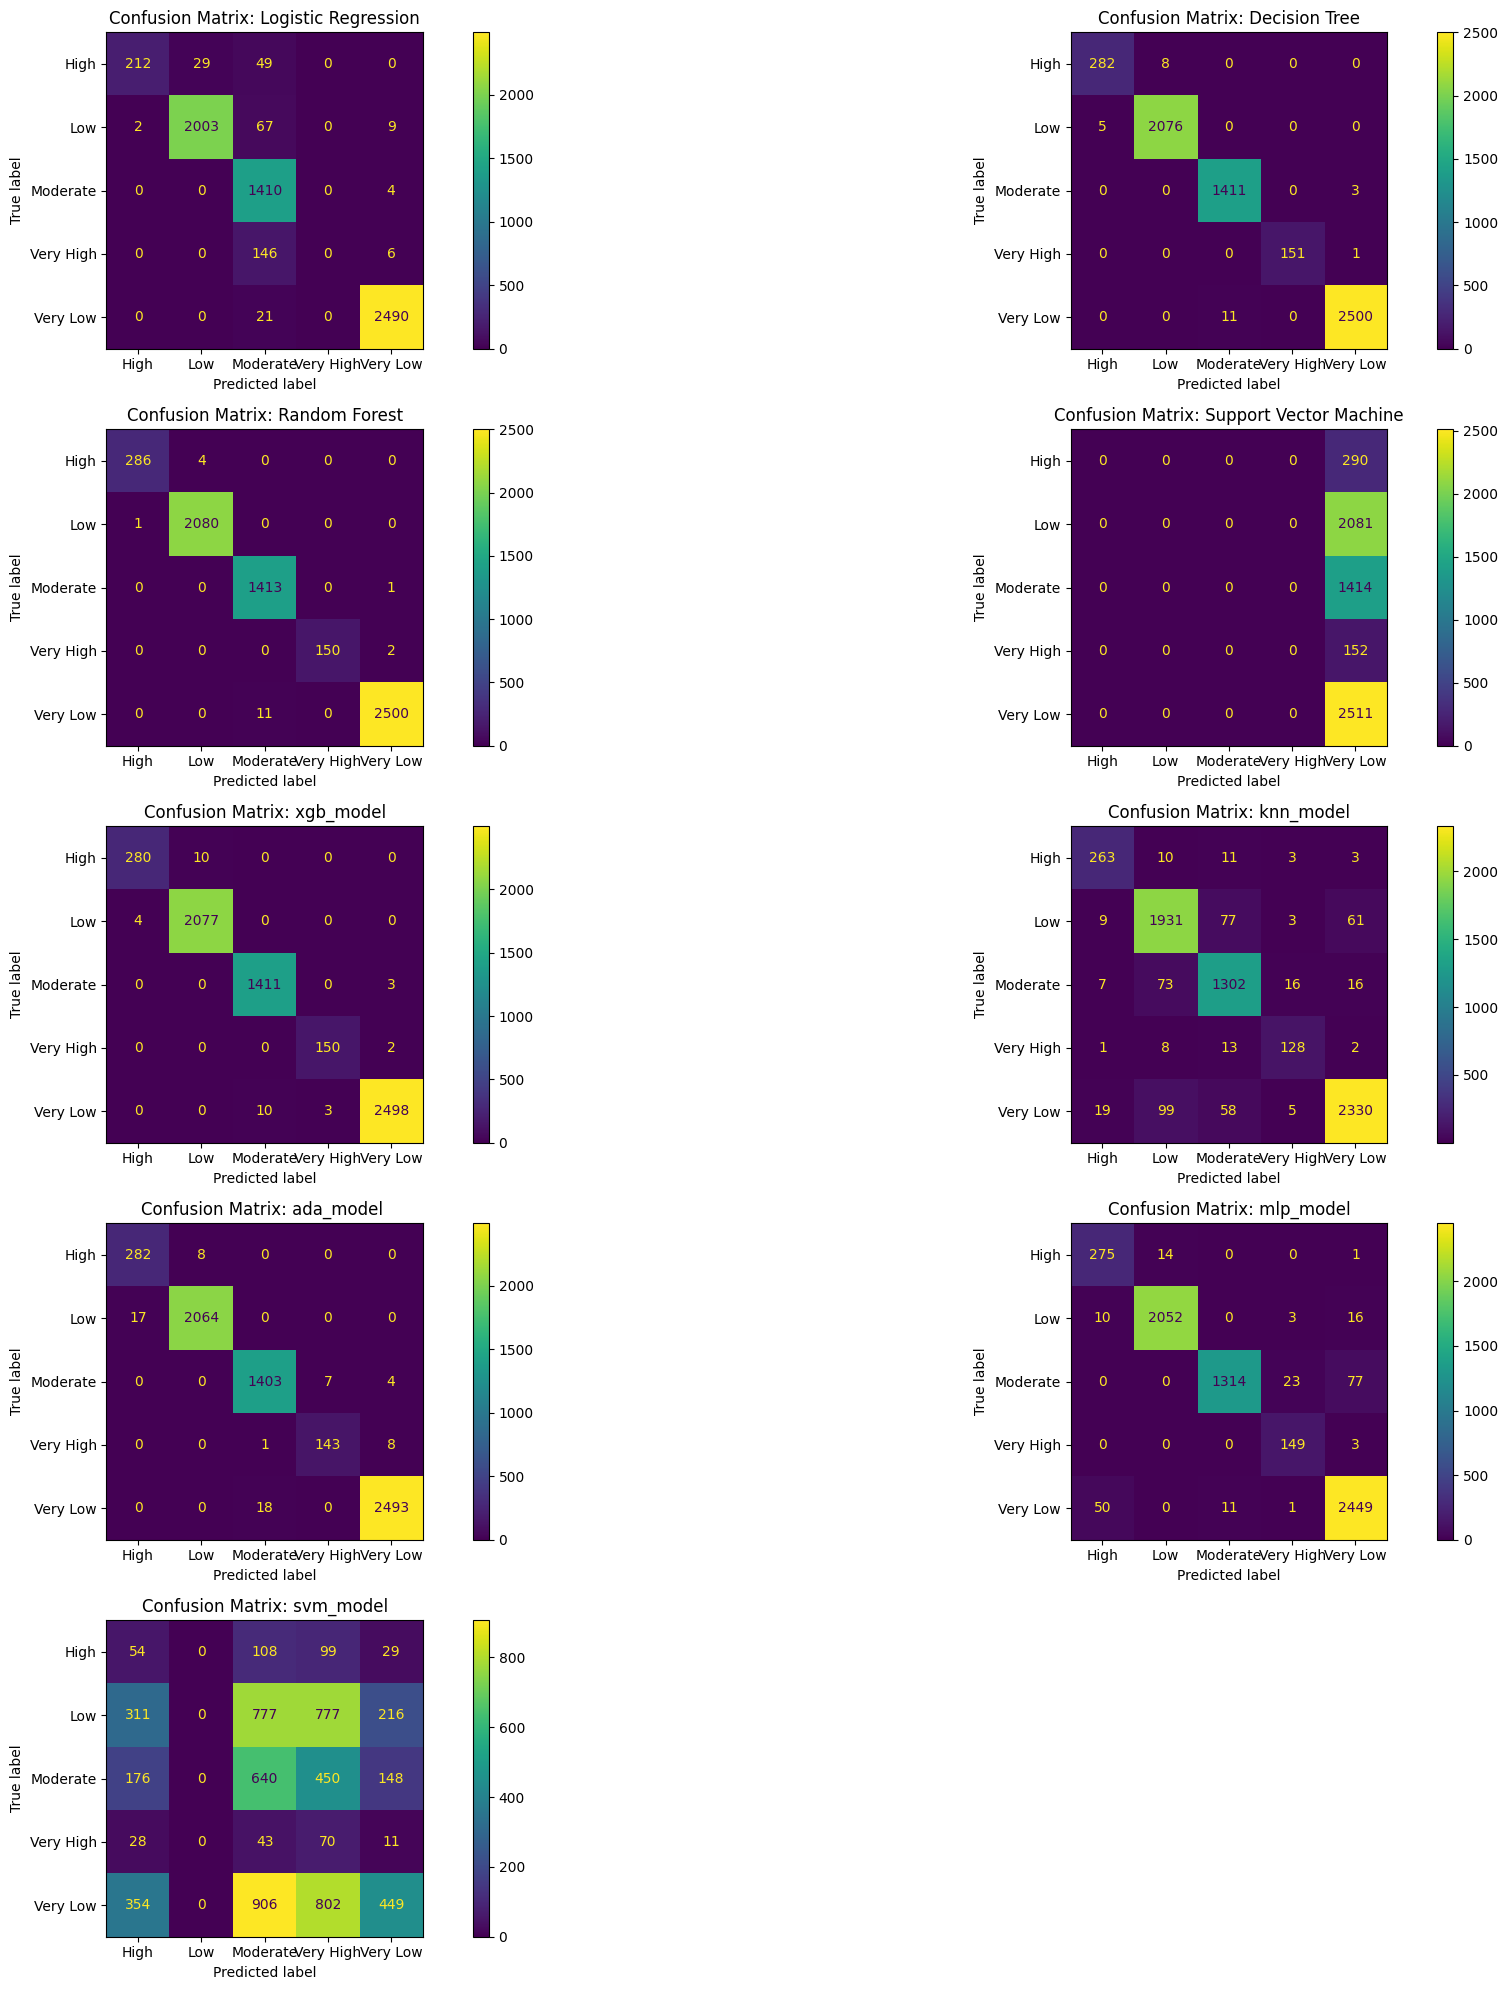

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Plot confusion matrices for each model
fig, axes = plt.subplots(nrows=(len(models) + 2) // 2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[idx], display_labels=ordinal_encoder.categories_[0])
    axes[idx].set_title(f"Confusion Matrix: {model_name}")

# Hide any unused subplots
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**<h4 align ="left" style='color: white'>Results Based on F1, Precision and Accuracy</h4>**

In [153]:
# Function to rank models based on a specific metric
def rank_models(results, metric):
    return sorted(results.items(), key=lambda x: x[1][metric], reverse=True)

# Rank models based on F1 Score, Precision, and Accuracy
ranked_by_f1 = rank_models(results, "F1 Score")
ranked_by_precision = rank_models(results, "Precision")
ranked_by_accuracy = rank_models(results, "Accuracy")

# Display rankings
print("Ranking by F1 Score:")
for rank, (model, scores) in enumerate(ranked_by_f1, start=1):
    print(f"{rank}. {model}: {scores['F1 Score']:.4f}")

print("\nRanking by Precision:")
for rank, (model, scores) in enumerate(ranked_by_precision, start=1):
    print(f"{rank}. {model}: {scores['Precision']:.4f}")

print("\nRanking by Accuracy:")
for rank, (model, scores) in enumerate(ranked_by_accuracy, start=1):
    print(f"{rank}. {model}: {scores['Accuracy']:.4f}")

Ranking by F1 Score:
1. Random Forest: 0.9971
2. Decision Tree: 0.9957
3. xgb_model: 0.9950
4. ada_model : 0.9903
5. mlp_model: 0.9680
6. Logistic Regression: 0.9375
7. knn_model: 0.9237
8. Support Vector Machine: 0.2183
9. svm_model: 0.1816

Ranking by Precision:
1. Random Forest: 0.9971
2. Decision Tree: 0.9957
3. xgb_model: 0.9950
4. ada_model : 0.9903
5. mlp_model: 0.9695
6. Logistic Regression: 0.9318
7. knn_model: 0.9245
8. svm_model: 0.2651
9. Support Vector Machine: 0.1517

Ranking by Accuracy:
1. Random Forest: 0.9971
2. Decision Tree: 0.9957
3. xgb_model: 0.9950
4. ada_model : 0.9902
5. mlp_model: 0.9676
6. Logistic Regression: 0.9484
7. knn_model: 0.9234
8. Support Vector Machine: 0.3894
9. svm_model: 0.1881


In [154]:
# from sklearn.ensemble import RandomForestClassifier
# from lightgbm import LGBMClassifier
# # from catboost import CatBoostClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier



# rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)
   

# # lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
# # lgbm_model.fit(X_train, y_train)
# # y_pred_lgbm = lgbm_model.predict(X_test)
   

# svm_model = SVC(class_weight='balanced', random_state=42)
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)
   

# mlp_model = MLPClassifier(random_state=42, max_iter=500)
# mlp_model.fit(X_train, y_train)
# y_pred_mlp = mlp_model.predict(X_test)
   

# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)
# y_pred_knn = knn_model.predict(X_test)
    

# ada_model = AdaBoostClassifier(random_state=42)
# ada_model.fit(X_train, y_train)
# y_pred_ada = ada_model.predict(X_test)


# dec_tree_Model = DecisionTreeClassifier(random_state=42),
# dec_tree_Model.fit(X_train, y_train)
# y_pred_decTree = dec_tree_Model.predict(X_test)


# # xgboost_model = XGBClassifier(random_state=42)
# # xgboost_model.fit(X_train, y_train)
# # y_pred_xgboost = xgboost_model.predict(X_test)
    

In [155]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import matplotlib.pyplot as plt

# # Define a function to plot confusion matrices
# def plot_confusion_matrices(y_test, predictions, model_names):
#     fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid for 6 models
#     axes = axes.flatten()
    
#     for i, (y_pred, model_name) in enumerate(zip(predictions, model_names)):
#         cm = confusion_matrix(y_test, y_pred)
#         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0])
#         disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
#         axes[i].set_title(model_name)
    
#     plt.tight_layout()
#     plt.show()

# # Predictions and model names
# predictions = [y_pred_rf, y_pred_svm, y_pred_mlp, y_pred_knn, y_pred_ada]
# model_names = ['Random Forest', 'SVM', 'MLP', 'KNN', 'AdaBoost']

# # Plot the confusion matrices
# plot_confusion_matrices(y_test, predictions, model_names)

In [156]:
# from sklearn.metrics import precision_score

# # Calculate precision, accuracy, and F1 score for each model
# results = []
# for model_name, y_pred in zip(model_names, predictions):
#     precision = precision_score(y_test, y_pred, average='weighted')
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred, average='weighted')
#     results.append({'Model': model_name, 'Precision': precision, 'Accuracy': accuracy, 'F1 Score': f1})

# # Create a DataFrame to display the results
# performance_df = pd.DataFrame(results)
# print(performance_df)

In [157]:
# # Rank models based on Precision, Accuracy, and F1 Score
# precision_rank = performance_df.sort_values(by='Precision', ascending=False)
# accuracy_rank = performance_df.sort_values(by='Accuracy', ascending=False)
# f1_score_rank = performance_df.sort_values(by='F1 Score', ascending=False)

# # Display the rankings
# print("Ranking based on Precision:")
# print(precision_rank)

# print("\nRanking based on Accuracy:")
# print(accuracy_rank)

# print("\nRanking based on F1 Score:")
# print(f1_score_rank)